# **Etapa 1**: Ambiente

## Importação das Bibliotecas

Aqui fizemos a importação das duas bibliotecas requeridas pelo **Desafio**, Pandas e Matplotlib com *alias* de pd e plt. Outras bibliotecas podem ser importadas, mas essas duas são obrigatórias, um requerimento do próprio **Desafio**.

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

## Importação do Dataset

O que gostamos de fazer sempre é examinar o estado do dataset, o que inclui entender a dimensão do dataset em linhas e colunas, procurar por dados faltantes, dados duplicados e os tipos dos dados.

In [259]:
df_raw = pd.read_csv('./googleplaystore.csv')
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Usamos shape para retornar uma tupla com a dimensão dos dados, que podem ser acessados posicionalmente, 0 para linhas e 1 para colunas

In [260]:
print('O dataset possui {} linhas e {} colunas'.format(df_raw.shape[0], df_raw.shape[1]))

O dataset possui 10841 linhas e 13 colunas


Utilizamos a função isna() para retornar uma lista com os dados faltantes e junto com a função sum(), somamos esses dados faltantes. Quando usado em conjunto com mais um uso da função sum() obtemos o valor absoluto de dados faltantes no dataset.

In [261]:
df_raw.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [262]:
print('O dataset possui {} dados faltantes'.format(df_raw.isna().sum().sum()))

O dataset possui 1487 dados faltantes


Utilizamos a função duplicated() para retornar uma lista com valores booleanos com as linhas que possuem dados duplicados, e quando encadeado com a função sum() obtemos o valor absoluto dessas linhas.

In [263]:
print('O dataset possui {} linhas duplicadas'.format(df_raw.duplicated().sum()))

O dataset possui 483 linhas duplicadas


Por fim, utilizamos dtypes para obter os tipos dos dados. Observamos que apenas a coluna Rating possui dados do tipo 'float', enquanto todas as outras colunas são do tipo 'string'. Isso pode oferecer um desafio mais tarde e conversões podem ser necessárias.

In [264]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# **Etapa 2**: Desenvolvimeto

## 1 - Remova as linhas duplicadas;

Para cada passo dessa etapa, faremos uma cópia do dataframe com a finalidade de ser prático na recuperação do estado dos dados se fizermos alguma transformação e precisarmos desfazer ela. Ao invés de refazermos a ingestão dos dados e rodar o código célula por célula, podemos só retornar ao início de cada tarefa dessa etapa e voltar para essa cópia.

In [265]:
df1 = df_raw.copy()

Aqui estamos conferindo a dimensão dos dados antes de eliminarmos os dados duplicados.

In [266]:
df1.shape

(10841, 13)

Eliminamos os dados duplicados com a função drop_duplicates() sinalizando o inplace como True para que a eliminação seja duradoura no dataframe df1.

In [267]:
df1.drop_duplicates(inplace=True)

Conferimos novamente a dimensão dos dados e constatamos que o número total de linhas foi afetado, mostrando que a eliminação de dados duplicados foi efetiva. Usamos a função duplicated() e sum() para conferir se há ainda dados duplicados no dataframe df1.

In [268]:
df1.shape

(10358, 13)

In [269]:
df1.duplicated().sum()

np.int64(0)

## 2 - Faça um gráfico de barras contendo os top 5 apps por número de instalação;

In [270]:
df2 = df1.copy()

Utilizamos value_count() para obter a quantidade de valores na coluna 'Installs'. Como é possível observar essa é uma coluna categórica, que não registra o número de instalação dos apps com precisão, mas registra em categorias de unidades, dezenas, centenas, milhares, dezenas de milhares, centenas de milhares, etc. Vamos precisar limpar e converter essa coluna.

In [271]:
df2['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

O uso de dtypes nos retorna o tipo dos dados nas colunas, observamos que Installs está como object, sendo uma coluna que armazena dados do tipo 'string', e precisamos converter para 'integer'.

In [272]:
df2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Existe um dado registrado como 'Free', o que nos leva a crer que foi um erro na exportação desses dados para o arquivo .csv, podemos arrancar ele fora ou podemos entender qual o problema. O item 10472 deveria ter recebido um valor faltante em categoria, então a solução é jogar todos os dados para a próxima categoria com a ajuda da biblioteca NumPy:

In [273]:
free = df2.loc[10472].copy()
correcao = [free['App']] + [np.nan] + list(free[1:].values)[:-1]
df2.loc[10472] = correcao

print(df2.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object


/tmp/ipykernel_17340/2344895112.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[10472] = correcao


Agora vamos precisar limpar a coluna retirando o sinal gráfico de '+' e convertendo ela para inteiro.

In [274]:
df2['Installs'] = df2['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

Feita a limpeza e a conversão, vamos ordenar a lista, selecionar um top 5 e plotar o gráfico

In [290]:
df_aux = df2.sort_values('Installs', ascending=False).drop_duplicates('App', keep='first').head()
df_aux

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


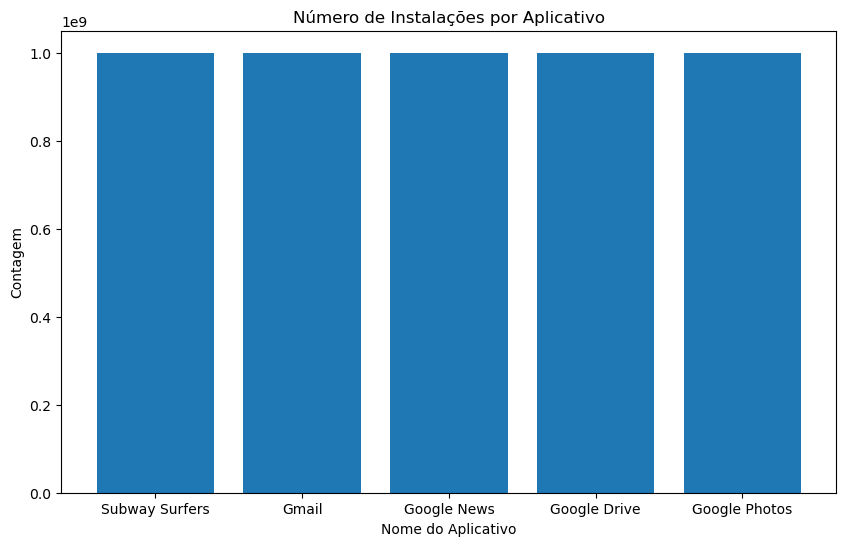

In [291]:
plt.figure(figsize=(10, 6))

plt.bar(df_aux['App'], df_aux['Installs'])

plt.title('Número de Instalações por Aplicativo')
plt.xlabel('Nome do Aplicativo')
plt.ylabel('Contagem')
plt.show()

# Etapa 3
## Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem;

In [277]:
df3 = df2.copy()

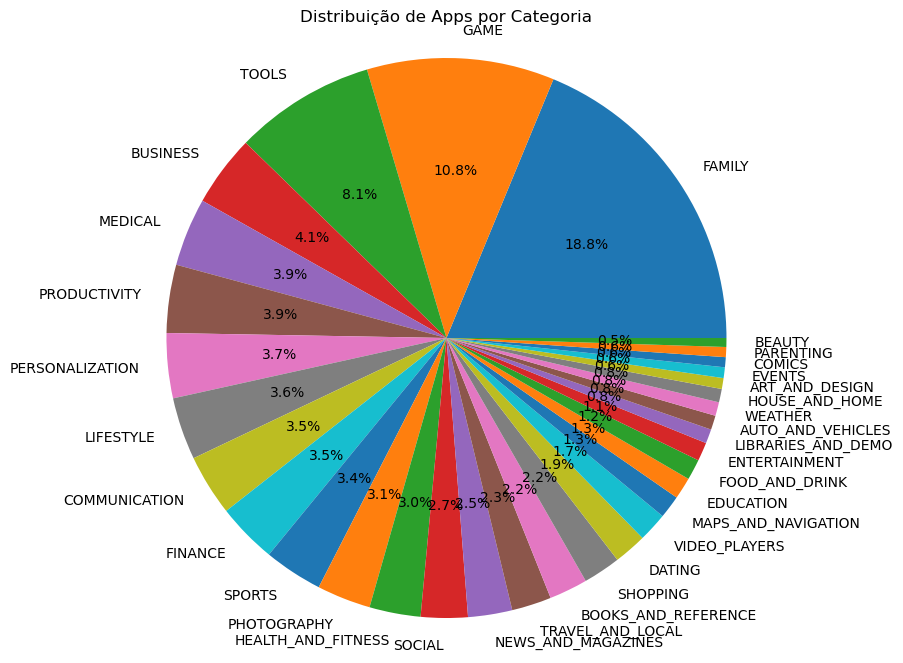

In [278]:
contagem = df3['Category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    contagem,
    labels=contagem.index,
    autopct='%.1f%%',
)

plt.title('Distribuição de Apps por Categoria')
plt.axis('equal')
plt.show()

In [279]:
aux = df3.copy()
aux['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

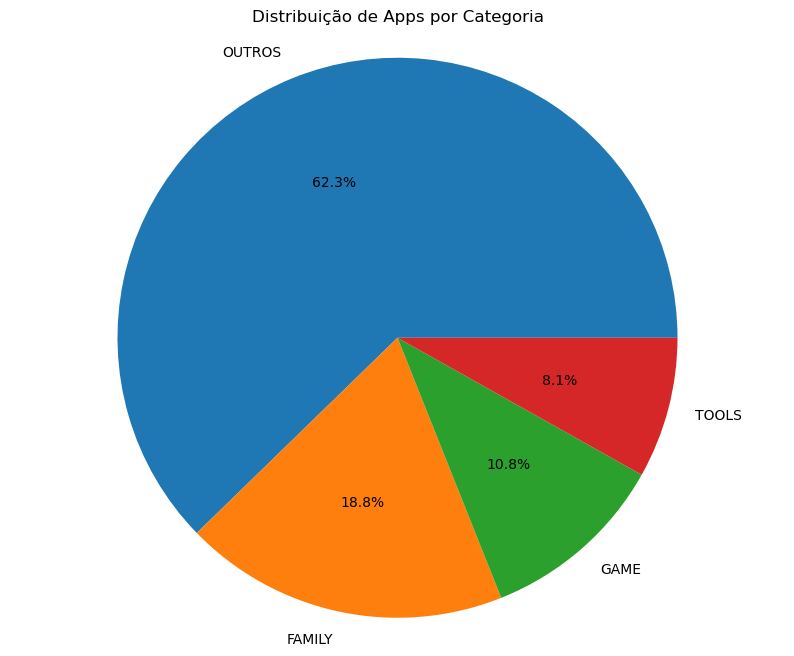

In [280]:
contagem = aux['Category'].value_counts()

categorias_principais = contagem[contagem >= 800].index

aux['Categoria Agrupada'] = aux['Category'].apply(lambda x: x if x in categorias_principais else 'OUTROS')

contagem_agrupada = aux['Categoria Agrupada'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    contagem_agrupada,
    labels=contagem_agrupada.index,
    autopct='%.1f%%',
)
plt.title('Distribuição de Apps por Categoria')
plt.axis('equal')
plt.show()

# Etapa 4
## Mostre qual o app mais caro existente no dataset;

In [281]:
df4 = df3.copy()

In [282]:
df4.loc[df4['Price'] == 'Free', 'Price'] = 0
df4['Price'] = df4['Price'].str.replace('$', '').astype(float)

In [283]:
df_aux2 = df4.sort_values('Price', ascending=False).head()
df_aux2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


In [284]:
df4.loc[df4['Price'] == df4['Price'].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


# Etapa 5
## Mostre quantos apps são classificados como '**Mature 17**';

In [285]:
df5 = df4.copy()

In [ ]:
contagem = (df5['Content Rating'] == 'Mature 17+').sum()
print(f'{contagem} apps têm o Content Rating Mature 17+.')

447 apps tem o Content Rating Mature 17+.


# Etapa 6
## Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews;

In [287]:
df6 = df5.copy()

In [288]:
df6['Reviews'] = df6['Reviews'].astype(int)

In [294]:
df_aux = df6.sort_values('Reviews', ascending=False).head(10).sort_index().reset_index(drop=True)
df_aux[['App', 'Reviews']]

,App,Reviews
0,Messenger – Text and Video Chat for Free,56642847
1,WhatsApp Messenger,69119316
2,Messenger – Text and Video Chat for Free,56646578
3,Clash of Clans,44893888
4,Facebook,78158306
5,Instagram,66577313
6,Instagram,66577446
7,WhatsApp Messenger,69109672
8,Instagram,66509917
9,Facebook,78128208


# Etapa 7
## Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset";

### Formato de Lista

### Formato de Valor

# Etapa 8
## Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca **Matplotlib**.